## Chest-xRay classification

<p >In this project we will try to build a classifier that tries to predict image for patients and we will use a dataset contains on X-ray for the chest and there is two class <br>0-Normal<br>1-Pneumonia<br>the data suffering from imbalanced data and we will try to overcome this problem by using two techniques <br> 1-over-samples (SMOTE)<br>2-data augmentation<br>
and We will explain that later on this note.
and we will use three algorithms to build a classifier a Support vector machine (SVM) , k nearest neighbor (KNN) and RandomForest.  
</p>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import os 
import cv2
import imgaug.augmenters as IA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import  SMOTE
from collections  import Counter


train_path = "train"
test_path = "test"
val_path = "val"


img_size = 28 
seed = 42 


#### Data visualization 
as we said we have two class one it is normal the another is Pneumonia as show in figures

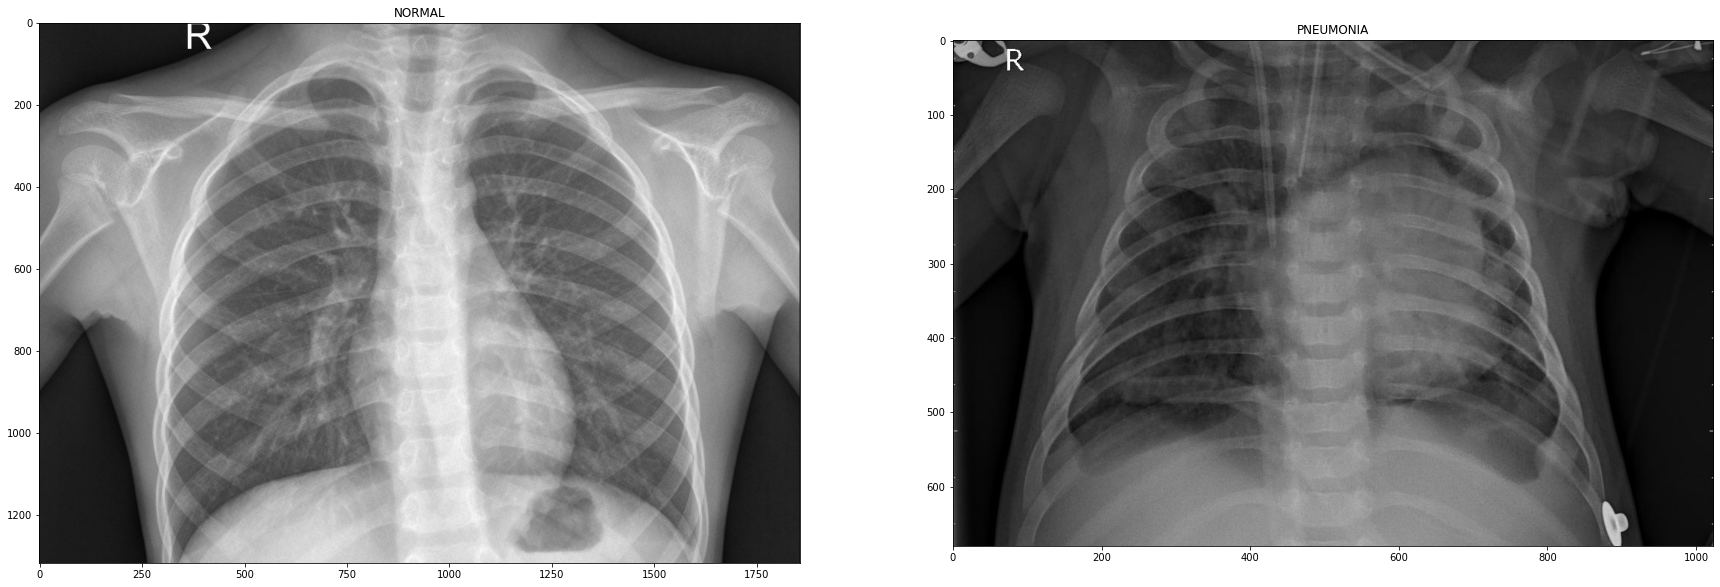

<Figure size 720x1440 with 0 Axes>

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30,10))
plt.figure(figsize=(10,20))

img1 = cv2.imread('IM-0001-0001.jpeg')
img2 = cv2.imread('person100_bacteria_477.jpeg')
ax1.set_title('NORMAL')
ax2.set_title('PNEUMONIA')

ax1.imshow(img1)
ax2.imshow(img2)

In [5]:
def plot_confusion_matrix(actual,pred): # Plot the confusion matrix 
    sn.heatmap(confusion_matrix(actual ,pred),annot=True, yticklabels=['Actual:NORMAL','Actual:PNEUMONIA'],xticklabels=['Predicted: NORMAL ','Predicted: PNEUMONIA']
               ,fmt="g",cmap='Greens')
    plt.tight_layout()
    plt.show()


### Create Training data set  and test data

the data is raw image first we need to read image in gray sacle then we resize the image to 28x28 becuase the image have a diffrient dimsonsion. For that we will use openCV library (cv2) in we will save it as csv file.

In [6]:
def create_dataset(dir_path):
    X = []
    y = []
    Classes = ["NORMAL","PNEUMONIA"]
    for i in range(len(Classes)):
        path = os.path.join(dir_path,Classes[i]) # path to each class
        print("Reading Imgae in GrayScale class {}".format(Classes[i]))
        for image in os.listdir(path):
            try:
                image_path = os.path.join(path,image) # image path
                
                image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE) # Read Image in gray sacle
                
                image = cv2.resize(image,(img_size,img_size))# reszie image by 28x28
                
                X.append(image.flatten())# flat the image array to end up  array in 2d-array 
                
                y.append(i) # label for image 
                    
            except Exception as e:
                pass
        print("Reading Image for class {} is done".format(Classes[i]))
    
    return X , y 


In [7]:
if not os.path.exists("Train.csv"):
    Train_X , Train_y = create_dataset(dir_path=train_path)
    Train_X = np.array(Train_X)
    Train_y = np.array(Train_y)

    train_set = pd.DataFrame(data=Train_X)
    train_set["target"] = Train_y
    train_set.to_csv("Train.csv",index=False)
else:
    train_set = pd.read_csv("Train.csv")
    print("Data is loaded !!!")

Data is loaded !!!


### Create Test data 


In [8]:
if not os.path.exists("Test.csv"):
    Test_X , Test_y = create_dataset(dir_path=test_path)
    Test_X = np.array(Test_X)
    Test_y = np.array(Test_y)

    test_set = pd.DataFrame(data=Test_X)
    test_set["target"] = Test_y
    test_set.to_csv("Test.csv",index=False)
else:
    test_set = pd.read_csv("Test.csv")

    print("Data is loaded !!!")

Data is loaded !!!


### Imbalanced data 
It's normal to have imbalanced data, especially in medical data, and for that, we have for normal class we have 1341 images and for Pneumonia have 3875 images in total we have 5216 images.

1    3875
0    1341
Name: target, dtype: int64


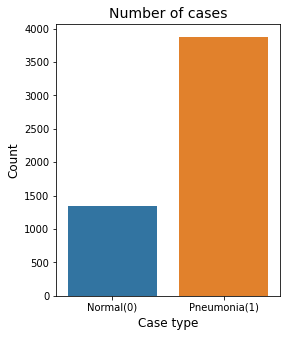

In [9]:
y = train_set['target'].value_counts()
print(y)
plt.figure(figsize=(4,5))
sn.barplot(x=y.index, y = y.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(y.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

In [10]:
x_train = train_set.drop('target', axis='columns')
y_train = train_set['target']

x_train = x_train / 255 # sacle the data to end up with vlaues between (0,1)


xTest = test_set.drop('target', axis='columns')
yTest = test_set['target']
xTest = xTest / 255

In [11]:
Results_over = {'SVM-A':0,'SVM-P':0,'SVM-R':0,'KNN-A':0,'KNN-P':0,'KNN-R':0,'RAN-A':0,'RAN-P':0,'RAN-R':0}
Results_aug = {'SVM-A':0,'SVM-P':0,'SVM-R':0,'KNN-A':0,'KNN-P':0,'KNN-R':0,'RAN-A':0,'RAN-P':0,'RAN-R':0}

# after optimizing some parameters on the classifier
Results2_over = {'SVM-A':0,'SVM-P':0,'SVM-R':0,'KNN-A':0,'KNN-P':0,'KNN-R':0,'RAN-A':0,'RAN-P':0,'RAN-R':0}
Results2_aug = {'SVM-A':0,'SVM-P':0,'SVM-R':0,'KNN-A':0,'KNN-P':0,'KNN-R':0,'RAN-A':0,'RAN-P':0,'RAN-R':0}

### classifier with imbalanced data 
First, we want to build a model using the imbalanced data and we will show how that affects on the model and we will show what the accuracy we got and how much we got for the precision and recall.

Accuracy on test data: 0.7676282051282052
Precision for test data: 0.7324478178368121
Recall: for test data 0.9897435897435898


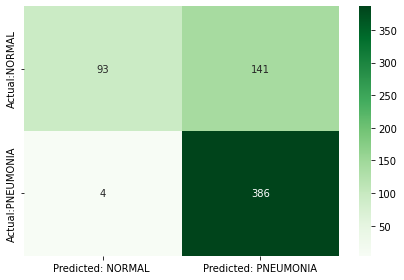

In [12]:

svc = SVC()
svc.fit(x_train,y_train)

pred2 = svc.predict(xTest)



print('Accuracy on test data:',accuracy_score(yTest,pred2))
print('Precision for test data:',metrics.precision_score(yTest,pred2))
print('Recall: for test data',metrics.recall_score(yTest,pred2))

plot_confusion_matrix(actual=yTest,pred=pred2)

as we can see we got for the validation set 75% accuracy that good but we got on test data 76% accuracy and we got for test data precision 72% and for recall 98% which means the model will predict incorrect labels as we can see from confusion matrix it predict for normal class 90 from 234 and for Pneumonia it's only 4 got incorrect.

### Over-samples (SMOTE)

Smote stands for synthetic minority over-sampling technique the idea behind this is to duplicate the samples in the minority class but rather than duplicate with the replacement it will create a synthetic example and it's done on feature space. synthetic example it will be created using k-nearest-neighbor (k = 5) first it will chose at random on sample then find the K-nearest neighbor then choice one of it's k-nearest neighbor, new sample will be calculated as following <br><br>$new sample = x_i  + random(0,1) * (x_i - x_j) $

where:<br>
$x_i$: random sample <br>
$x_j$ : one of nearest neighbor from $x_i$

we will use smote algorithm from library imblearn to help us to use SMOTE.[1]

0    3875
1    3875
Name: target, dtype: int64


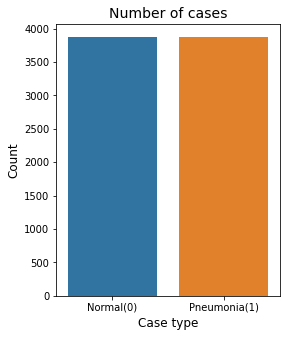

In [13]:
smote = SMOTE(random_state=42)

X_smote , y_smote = smote.fit_resample(x_train,y_train)

count = y_smote.value_counts()
print(count)
plt.figure(figsize=(4,5))
sn.barplot(x=count.index, y = count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

### Data Augmentation 
the second technique is data augmentation is widely used in image preprocessing it's used to generate a new sample in a minority class and it's done by performing some operations on the same image like rotation, zoom in/out, and flipping the image and more. 
and we will use three operation which is <br>1-horizontal flips <br> 2- rotation by 20 degree <br>3-zoom in<br>
and we will use imgaug library to help us.

In [14]:
aug = IA.OneOf([
    IA.Fliplr(), # horizontal flips
    IA.Affine(rotate=30), # roatation
    IA.Affine(scale=0.3) ]) # zoom in  

In [15]:
def create_dataset_aug():
    X = []
    y = []
    count =0
    Classes = ["NORMAL","PNEUMONIA"]
    for i in range(len(Classes)):
        path = os.path.join(train_path,Classes[i]) # path to each class
        print("Reading Imgae in GrayScale class {}".format(Classes[i]))
        for image in os.listdir(path):
            try:
                image_path = os.path.join(path,image) # image path
                
                image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE) # Read Image in gray sacle
                
                image = cv2.resize(image,(img_size,img_size))# reszie image by 28x28
                if i == 0 and count != 1268:
                    image_aug1= aug.augment_image(image)
                    image_aug2= aug.augment_image(image)
                    X.append(image_aug1.flatten())# flat the image array to end up  array in 2d-array 
                    X.append(image_aug2.flatten())# flat the image array to end up  array in 2d-array 
                    y.append(i)
                    y.append(i)
                    count +=1
                
                X.append(image.flatten())# flat the image array to end up  array in 2d-array 
                
                y.append(i) # label for image 
                    
            except Exception as e:
                pass
        print("Reading Image for class {} is done".format(Classes[i]))
    
    return X , y 

In [16]:
if not os.path.exists("Train_aug.csv"):
    TrainAug_X , TrainAug_y = create_dataset_aug()
    TrainAug_X = np.array(TrainAug_X)
    TrainAug_y = np.array(TrainAug_y)

    TrainAug_set = pd.DataFrame(data=TrainAug_X)
    TrainAug_set["target"] = TrainAug_y
    TrainAug_set.to_csv("Train_aug.csv",index=False)
else:
    TrainAug_set = pd.read_csv("Train_aug.csv")
    print("Data is loaded !!!")

Data is loaded !!!


In [17]:
TrainAug_set.head()

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,target
0,92,141,123,96,75,55,14,18,2,127,...,207,207,194,194,149,91,10,22,30,0
1,0,0,0,0,0,9,22,22,75,115,...,10,19,25,10,0,0,0,0,0,0
2,17,69,97,113,140,113,102,70,252,79,...,189,130,135,150,175,46,18,31,32,0
3,32,57,102,120,72,66,151,125,146,179,...,142,122,105,121,120,106,88,0,0,0
4,32,57,102,120,72,66,151,125,146,179,...,142,122,105,121,120,106,88,0,0,0


0    3877
1    3875
Name: target, dtype: int64


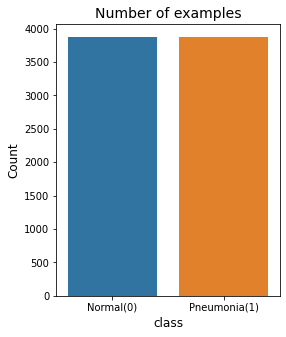

In [18]:
X_Aug = TrainAug_set.drop('target',axis='columns')
y_Aug = TrainAug_set['target']
X_Aug = X_Aug/255
count = y_Aug.value_counts()
print(count)
plt.figure(figsize=(4,5))
sn.barplot(x=count.index, y = count.values)
plt.title('Number of examples', fontsize=14)
plt.xlabel('class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

### Support vector machine (SVM)
The first classifier we have is SVM first we will implement SVM using the default parameter then we will try different parameters to achieve the best result on our test data

In [19]:
svc_overSamples = SVC()
svc_overSamples.fit(X_smote,y_smote)

svc_Aug = SVC()
svc_Aug.fit(X_Aug,y_Aug)

SVC()

OverSamples
Accuracy on test data: 0.782051282051282
Precision for test data: 0.75
Recall: for test data 0.9769230769230769


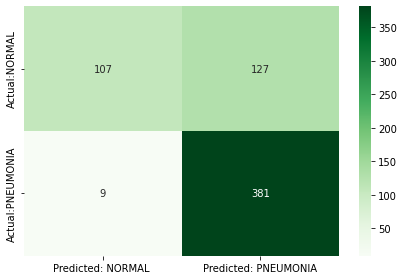

Data augmentation
Accuracy on test data: 0.782051282051282
Precision for test data: 0.7509881422924901
Recall: for test data 0.9743589743589743


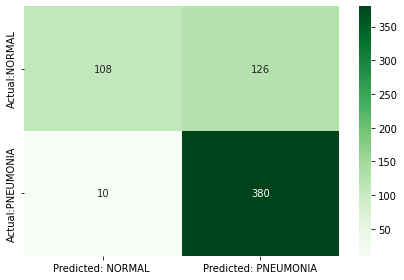

In [20]:
pred_over = svc_overSamples.predict(xTest)
pred_aug = svc_Aug.predict(xTest)

print("OverSamples")

print('Accuracy on test data:',accuracy_score(yTest,pred_over))
print('Precision for test data:',metrics.precision_score(yTest,pred_over))
print('Recall: for test data',metrics.recall_score(yTest,pred_over))

plot_confusion_matrix(actual=yTest,pred=pred_over)

print("Data augmentation")
print('Accuracy on test data:',accuracy_score(yTest,pred_aug))
print('Precision for test data:',metrics.precision_score(yTest,pred_aug))
print('Recall: for test data',metrics.recall_score(yTest,pred_aug))

plot_confusion_matrix(actual=yTest,pred=pred_aug)

Results_over['SVM-A']=accuracy_score(yTest,pred_over)
Results_over['SVM-P']=metrics.precision_score(yTest,pred_over)
Results_over['SVM-R']=metrics.recall_score(yTest,pred_over)
Results_aug['SVM-A']=accuracy_score(yTest,pred_aug)
Results_aug['SVM-P']=metrics.precision_score(yTest,pred_aug)
Results_aug['SVM-R']=metrics.recall_score(yTest,pred_aug)

### SVM Parameters 
There are several parameters for SVM but we are interested in one which is C, we will try C on 4 values {0.1,1,10,100} and we will see the accuracy of test data <br>
C: cost of misclassified examples 


In [21]:
clfs =[]
C = [0.1, 1, 10, 100]
for i in range(4):
    clfs.append(SVC(C=C[i],gamma='auto').fit(X_smote,y_smote).predict(xTest))

In [22]:
acc_test = []
for i in range(4):
    acc_test.append(accuracy_score(yTest,clfs[i]))
print(acc_test)

[0.8317307692307693, 0.7900641025641025, 0.782051282051282, 0.7740384615384616]


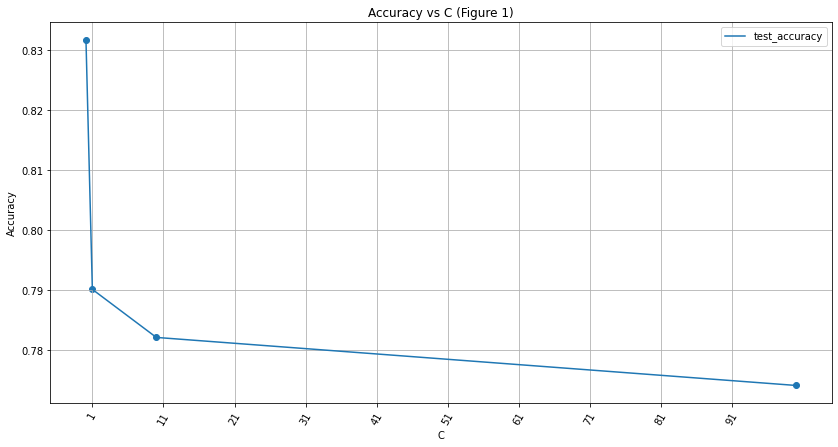

In [23]:
plt.figure(figsize=(14, 7))
plt.plot(C, acc_test, label='test_accuracy')
plt.scatter(C, acc_test)

plt.xticks(ticks=np.arange(1,100,10), rotation=60)
plt.grid()
plt.legend()
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title('Accuracy vs C (Figure 1)')
plt.show()

From the graph we can say that the best accuracy is 83% and C = 0.1, now let fit the model

In [24]:
svc_overSample = SVC(C=0.1,gamma='auto')
svc_overSample.fit(X_smote,y_smote)


SVC(C=0.1, gamma='auto')

OverSamples
Accuracy on test data: 0.8317307692307693
Precision for test data: 0.8501228501228502
Recall: for test data 0.8871794871794871


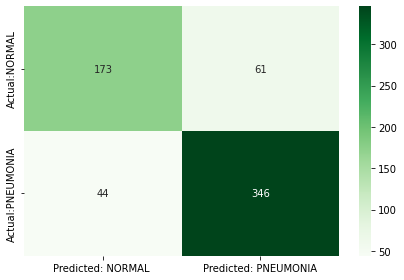

In [25]:
pred_over = svc_overSample.predict(xTest)

print("OverSamples")

print('Accuracy on test data:',accuracy_score(yTest,pred_over))
print('Precision for test data:',metrics.precision_score(yTest,pred_over))
print('Recall: for test data',metrics.recall_score(yTest,pred_over))

plot_confusion_matrix(actual=yTest,pred=pred_over)

Results2_over['SVM-A']=accuracy_score(yTest,pred_over)
Results2_over['SVM-P']=metrics.precision_score(yTest,pred_over)
Results2_over['SVM-R']=metrics.recall_score(yTest,pred_over)

In [26]:
clfs =[]
C = [0.1, 1, 10, 100]
for i in range(4):
    clfs.append(SVC(C=C[i],gamma='auto').fit(X_Aug,y_Aug).predict(xTest))

In [27]:
acc_test2 = []
for i in range(4):
    acc_test2.append(accuracy_score(yTest,clfs[i]))
print(acc_test2)

[0.8269230769230769, 0.7852564102564102, 0.7884615384615384, 0.7772435897435898]


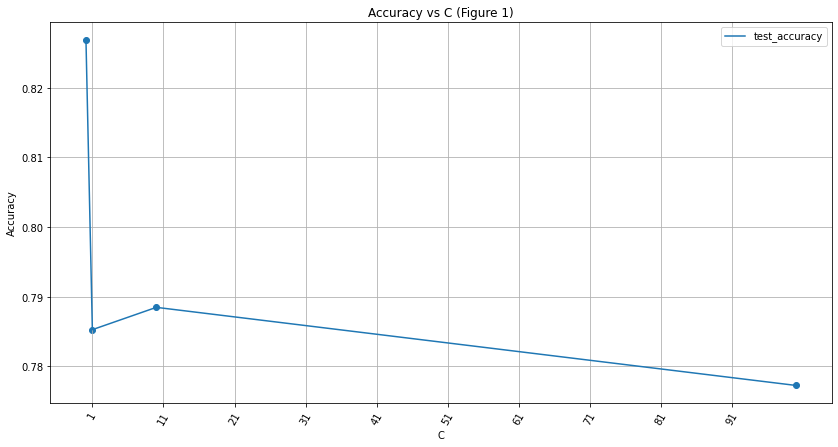

In [28]:
plt.figure(figsize=(14, 7))
plt.plot(C, acc_test2, label='test_accuracy')
plt.scatter(C, acc_test2)

plt.xticks(ticks=np.arange(1,100,10), rotation=60)
plt.grid()
plt.legend()
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title('Accuracy vs C (Figure 1)')
plt.show()

In [29]:
svc_augm = SVC(C=0.1,gamma='auto')
svc_augm.fit(X_Aug,y_Aug)


SVC(C=0.1, gamma='auto')

Data augmentation
Accuracy on test data: 0.8269230769230769
Precision for test data: 0.8105726872246696
Recall: for test data 0.9435897435897436


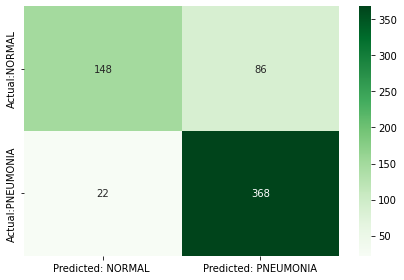

In [30]:
pred_aug = svc_augm.predict(xTest)

print("Data augmentation")

print('Accuracy on test data:',accuracy_score(yTest,pred_aug))
print('Precision for test data:',metrics.precision_score(yTest,pred_aug))
print('Recall: for test data',metrics.recall_score(yTest,pred_aug))

plot_confusion_matrix(actual=yTest,pred=pred_aug)

Results2_aug['SVM-A']=accuracy_score(yTest,pred_aug)
Results2_aug['SVM-P']=metrics.precision_score(yTest,pred_aug)
Results2_aug['SVM-R']=metrics.recall_score(yTest,pred_aug)

### RandomForest 
RandomForest is an ensemble method that allows us to have a set of decision trees, and it also doesn't suffer from an overfitting issue.
and it's done by splitting the dataset and training a decision tree classifier then when it predicts it uses all of the trees that we have in RandomForest to make the prediction. And we will use RandomForestClassifier from sklearn library and we will have about 100 decision tree in our forest.

In [31]:
Forest_over = RandomForestClassifier(class_weight="balanced_subsample",criterion='entropy',n_estimators=100,random_state=0,verbose=1,n_jobs=-1)
Forest_over = Forest_over.fit(X_smote, y_smote)

y_predict_test = Forest_over.predict(xTest)

Forest_aug =RandomForestClassifier(criterion='entropy',class_weight="balanced_subsample",n_estimators=100,random_state=0,verbose=1,n_jobs=-1)
Forest_aug = Forest_aug.fit(X_Aug, y_Aug)

y_predict_test2 = Forest_aug.predict(xTest)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Accuracy of the test data (SMOTE) = 0.8157051282051282
Precision for test data: 0.780040733197556
Recall: for test data 0.982051282051282


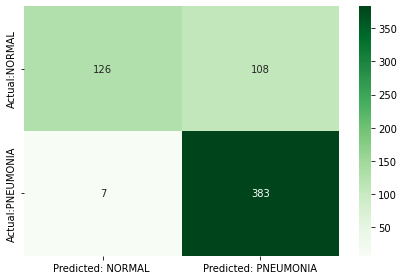

Accuracy of the test data (Data Augmentation) = 81.0%
Precision for test data: 0.7768762677484787
Recall: for test data 0.982051282051282


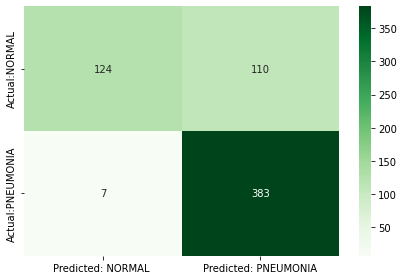

In [32]:
print('Accuracy of the test data (SMOTE) =', accuracy_score(yTest, y_predict_test))
print('Precision for test data:',metrics.precision_score(yTest,y_predict_test))
print('Recall: for test data',metrics.recall_score(yTest,y_predict_test))

plot_confusion_matrix(yTest,y_predict_test)
Results_over['RAN-A']=accuracy_score(yTest,y_predict_test)
Results_over['RAN-P']=metrics.precision_score(yTest,y_predict_test)
Results_over['RAN-R']=metrics.recall_score(yTest,y_predict_test)
print(f'Accuracy of the test data (Data Augmentation) = {round(accuracy_score(yTest, y_predict_test2), 2)*100}%')
print('Precision for test data:',metrics.precision_score(yTest,y_predict_test2))
print('Recall: for test data',metrics.recall_score(yTest,y_predict_test2))

plot_confusion_matrix(yTest,y_predict_test2)
Results_aug['RAN-A']=accuracy_score(yTest,y_predict_test2)
Results_aug['RAN-P']=metrics.precision_score(yTest,y_predict_test2)
Results_aug['RAN-R']=metrics.recall_score(yTest,y_predict_test2)

## KNN 
K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
In KNN first we will implement knn using the default parameter and (metric ='manhattan') then we will try different parameters to achieve the best result on our test data and trainig the data by (Over-sample,data augmentation)

In [33]:

clfs_knn1=(KNeighborsClassifier(metric='manhattan').fit(X_smote,y_smote))
clfs_knn2=(KNeighborsClassifier(metric='manhattan').fit(X_Aug,y_Aug))

In [34]:
over_knn = clfs_knn1
aug_knn = clfs_knn2

In [35]:
over_predK   = over_knn.predict(xTest)
aug_predK    = aug_knn.predict(xTest)


Accuracy on test data is (Over sample (smote) ) 0.8605769230769231
Precision for test data: 0.8615751789976134
Recall: for test data 0.9256410256410257


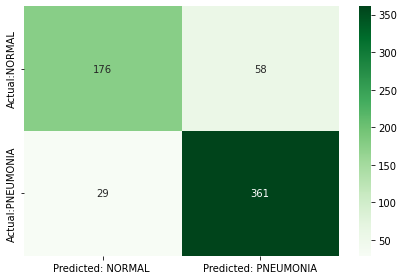

Accuracy on test data is (data augmentation ) 0.8028846153846154
Precision for test data: 0.761252446183953
Recall: for test data 0.9974358974358974


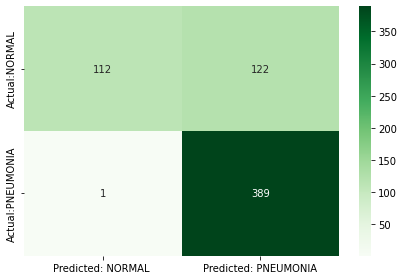

In [36]:
print("Accuracy on test data is (Over sample (smote) )",accuracy_score( yTest,over_predK))



print('Precision for test data:',metrics.precision_score(yTest,over_predK))

print('Recall: for test data',metrics.recall_score(yTest,over_predK))
plot_confusion_matrix(yTest,over_predK)


print("Accuracy on test data is (data augmentation )",accuracy_score( yTest,aug_predK))
print('Precision for test data:',metrics.precision_score(yTest,aug_predK))
print('Recall: for test data',metrics.recall_score(yTest,aug_predK))
plot_confusion_matrix(yTest,aug_predK)

Results_over['KNN-A']=accuracy_score(yTest,over_predK)
Results_over['KNN-P']=metrics.precision_score(yTest,over_predK)
Results_over['KNN-R']=metrics.recall_score(yTest,over_predK)

Results_aug['KNN-A']=accuracy_score(yTest,aug_predK)
Results_aug['KNN-P']=metrics.precision_score(yTest,aug_predK)
Results_aug['KNN-R']=metrics.recall_score(yTest,aug_predK)


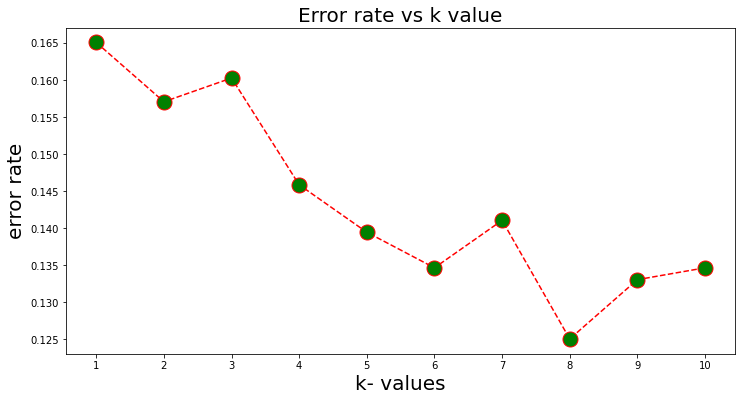

Minimum error:- 0.125 at K = 8


In [37]:

error_rate=[]#list that will store the average error rate value of k
end = 11
for i in range (1,end):  #Took the range of k from 1 to 30
    clf=KNeighborsClassifier(n_neighbors=i,metric='manhattan',n_jobs=-1)
    clf.fit(X_smote,y_smote)
    predict_i=clf.predict(xTest)
    error_rate.append(np.mean(predict_i!=yTest))
#plotting the error rate vs k graph 
plt.figure(figsize=(12,6))
plt.plot(range(1,end),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,end))
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

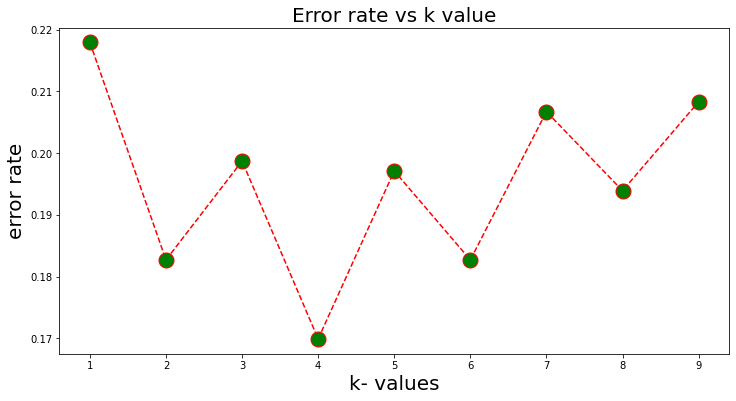

Minimum error:- 0.16987179487179488 at K = 4


In [38]:
error_rate=[] #list that will store the average error rate value of k
end = 10

for i in range (1,end):  #Took the range of k from 1 to 30
    clf=KNeighborsClassifier(n_neighbors=i,metric='manhattan',n_jobs=-1)
    clf.fit(X_Aug,y_Aug)
    predict_i=clf.predict(xTest)
    error_rate.append(np.mean(predict_i!=yTest))
#plotting the error rate vs k graph 
plt.figure(figsize=(12,6))
plt.plot(range(1,end),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,end))
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)


Accuracy on test data is (Over sample (smote) ) 0.875
Precision for test data: 0.8861386138613861
Recall: for test data 0.9179487179487179


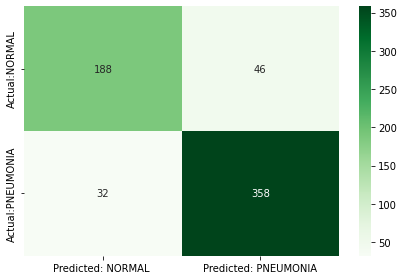

Accuracy on test data is (data augmentation ) 0.8301282051282052
Precision for test data: 0.797071129707113
Recall: for test data 0.9769230769230769


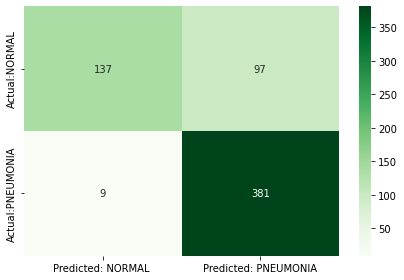

In [39]:
clfs_knn3=(KNeighborsClassifier(n_neighbors=8 ,metric='manhattan').fit(X_smote,y_smote))
clfs_knn4=(KNeighborsClassifier(n_neighbors=4,metric='manhattan').fit(X_Aug,y_Aug))

over_knn1 = clfs_knn3
aug_knn1 = clfs_knn4

over_predK1   = over_knn1.predict(xTest)
aug_predK1    = aug_knn1.predict(xTest)

print("Accuracy on test data is (Over sample (smote) )",accuracy_score( yTest,over_predK1))
print('Precision for test data:',metrics.precision_score(yTest,over_predK1))

print('Recall: for test data',metrics.recall_score(yTest,over_predK1))
plot_confusion_matrix(yTest,over_predK1)

print("Accuracy on test data is (data augmentation )",accuracy_score( yTest,aug_predK1))
print('Precision for test data:',metrics.precision_score(yTest,aug_predK1))
print('Recall: for test data',metrics.recall_score(yTest,aug_predK1))
plot_confusion_matrix(yTest,aug_predK1)



Results2_over['KNN-A']=accuracy_score(yTest,over_predK1)
Results2_over['KNN-P']=metrics.precision_score(yTest,over_predK1)
Results2_over['KNN-R']=metrics.recall_score(yTest,over_predK1)

Results2_aug['KNN-A']=accuracy_score(yTest,aug_predK1)
Results2_aug['KNN-P']=metrics.precision_score(yTest,aug_predK1)
Results2_aug['KNN-R']=metrics.recall_score(yTest,aug_predK1)

#### Results (Before optimize classifier parameter)
After trying to overcome the imbalanced data, we used two techniques. We test them on three classifiers and calculate each classifier's Accuracy, Precision, and Recall.

As we can see from the below graph we have got a higher accuracy in KNN which is 86% and for SVM we got 78% and randomForest

81% and for KNN we got for precision 86.1% as the highest on and for SVM 75%, Randomforest 78% but for the recall we got 92% for KNN

as the lowest one and for SVM and RandomFroest above 97% in case of precision and recall it is a trade-off but it is better to have

high precision as well as Recall and for that, the best classifier is KNN the results are based on slove the imbalanced problem using
OverSamples SMOTE.

For the data augmentation technique, the results that we got are completely different from what we got form

oversamples technique, and for that we got a higher accuracy of 81% using RandomForset and for KNN we got 80% and for SVM is 78%

for precision the results we got it is close to each other so that KNN is 75% and for SVM is 76% and RandomForest is 77%, 
but regarding to recall, all the three models score above 97%, as we said it's a trade-off but in this case which is having a high recall

and low precision and this is a sign that the model will predict more examples with incorrect labels.

[Text(0, 3, '0.976923'), Text(0, 3, '0.925641'), Text(0, 3, '0.982051')]

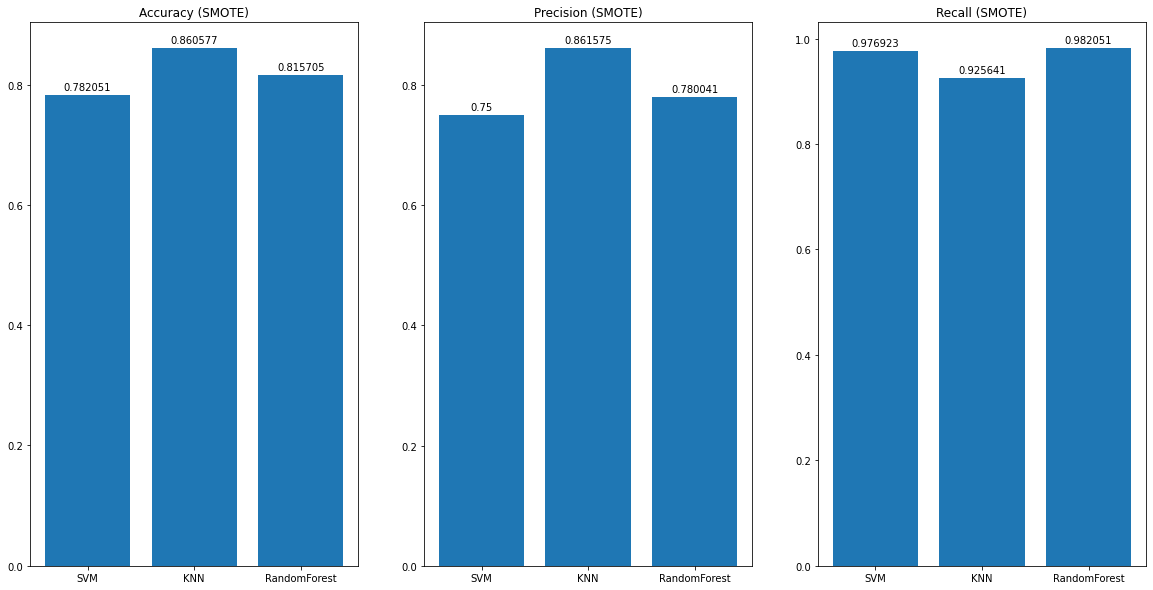

In [40]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(20,10))
x = ['SVM','KNN','RandomForest']
h = [Results_over['SVM-A'],Results_over['KNN-A'],Results_over['RAN-A']]
rects1 = ax1.bar(x=x , height= h,width=0.8)
ax1.set_title("Accuracy (SMOTE)")
ax1.bar_label(rects1, padding=3)

x = ['SVM','KNN','RandomForest']
h = [Results_over['SVM-P'],Results_over['KNN-P'],Results_over['RAN-P']]
rects2 = ax2.bar(x=x , height= h,width=0.8)
ax2.set_title("Precision (SMOTE)")
ax2.bar_label(rects2, padding=3)

x = ['SVM','KNN','RandomForest']
h = [Results_over['SVM-R'],Results_over['KNN-R'],Results_over['RAN-R']]
rects3 = ax3.bar(x=x , height= h,width=0.8)
ax3.set_title("Recall (SMOTE)")
ax3.bar_label(rects3, padding=3)



[Text(0, 3, '0.974359'), Text(0, 3, '0.997436'), Text(0, 3, '0.982051')]

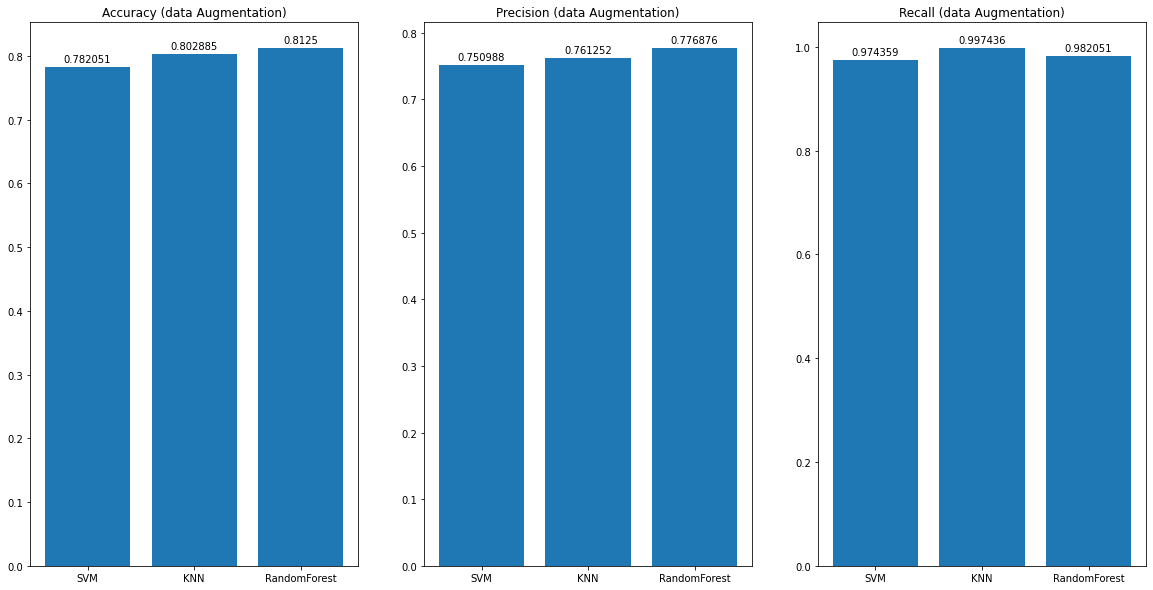

In [41]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(20,10))
x = ['SVM','KNN','RandomForest']
h = [Results_aug['SVM-A'],Results_aug['KNN-A'],Results_aug['RAN-A']]
rects1 = ax1.bar(x=x , height= h,width=0.8)

ax1.bar_label(rects1, padding=3)
ax1.set_title("Accuracy (data Augmentation)")

x = ['SVM','KNN','RandomForest']
h = [Results_aug['SVM-P'],Results_aug['KNN-P'],Results_aug['RAN-P']]
rects2 = ax2.bar(x=x , height= h,width=0.8)

ax2.bar_label(rects2, padding=3)

ax2.set_title("Precision (data Augmentation)")

x = ['SVM','KNN','RandomForest']
h = [Results_aug['SVM-R'],Results_aug['KNN-R'],Results_aug['RAN-R']]
ax3.set_title("Recall (data Augmentation)")
rects3 = ax3.bar(x=x , height= h,width=0.8)
ax3.bar_label(rects3, padding=3)

####  Results (After optimize classifier parameter)

After we optimize some parameter C for SVM and parameter K for KNN we got better results as follows, 

As we can see from the below graph we have got a higher accuracy in KNN which is 87.5% and for SVM we got 83% and randomForest

81.5% and for KNN we got for precision 88% as the highest on and for SVM 85%, Randomforest 78% but for the recall we got 88.7% for SVM

as the lowest one and for KNN we got 91% and for RandomFroest 98% in the case of precision and recall it is a trade-off but it is better to have

high precision as well as Recall and for that, the best classifier is KNN the results are based on slove the imbalanced problem using
OverSamples SMOTE.

For the data augmentation technique, the results that we got are completely different from what we got form

oversamples technique, and for that, we got a higher accuracy of 83% using KNN and for SVM we got 82 % and for RandomForest is 81%

for precision the results we got it is close to each other so that KNN is 79% and for SVM is 81% and RandomForest is 77%, 
but regarding to recall, all the  models score above 97% except SVM scores 94%, as we said it's a trade-off but in this case is having a high recall

and low precision and this is a sign that the model will predict more examples with incorrect labels. 


Text(0.5, 1.0, 'Recall (SOMTE)')

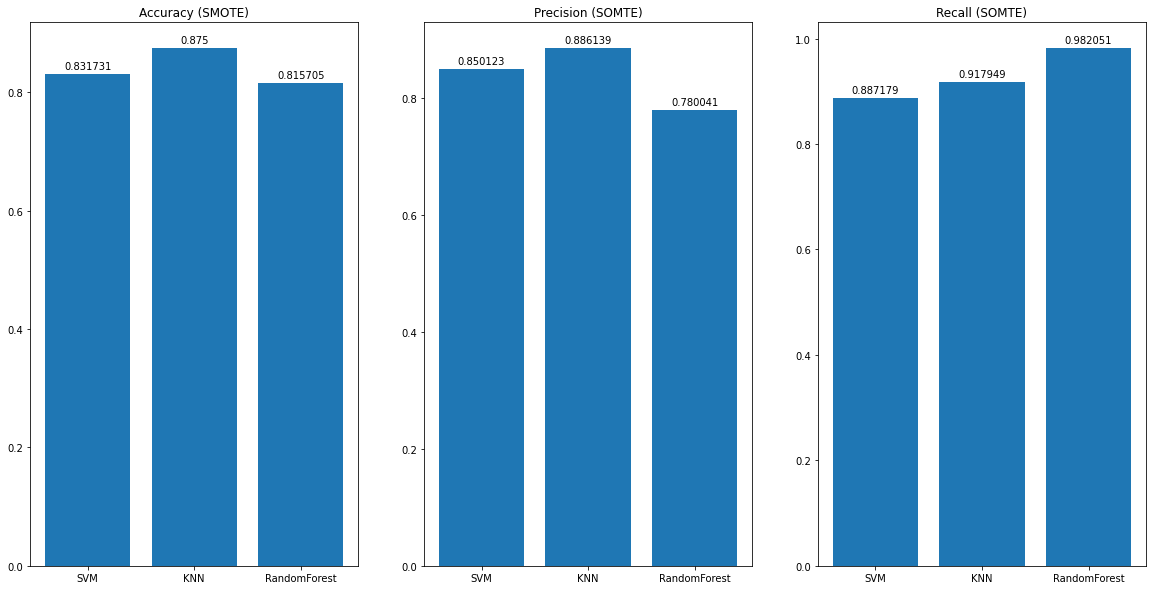

In [42]:
fig, (ax4, ax5,ax6) = plt.subplots(1, 3,figsize=(20,10))
x = ['SVM','KNN','RandomForest']
h = [Results2_over['SVM-A'],Results2_over['KNN-A'],Results_over['RAN-A']]
ax4.set_title("Accuracy (SMOTE)")
rects4 = ax4.bar(x=x , height= h,width=0.8)
ax4.bar_label(rects4, padding=3)

x = ['SVM','KNN','RandomForest']
h = [Results2_over['SVM-P'],Results2_over['KNN-P'],Results_over['RAN-P']]
rects5 = ax5.bar(x=x , height= h,width=0.8)
ax5.bar_label(rects5, padding=3)

ax5.set_title("Precision (SOMTE)")

x = ['SVM','KNN','RandomForest']
h = [Results2_over['SVM-R'],Results2_over['KNN-R'],Results_over['RAN-R']]
rects6= ax6.bar(x=x , height= h,width=0.8)
ax6.bar_label(rects6, padding=3)

ax6.set_title("Recall (SOMTE)")



Text(0.5, 1.0, 'Recall (data Augmentation)')

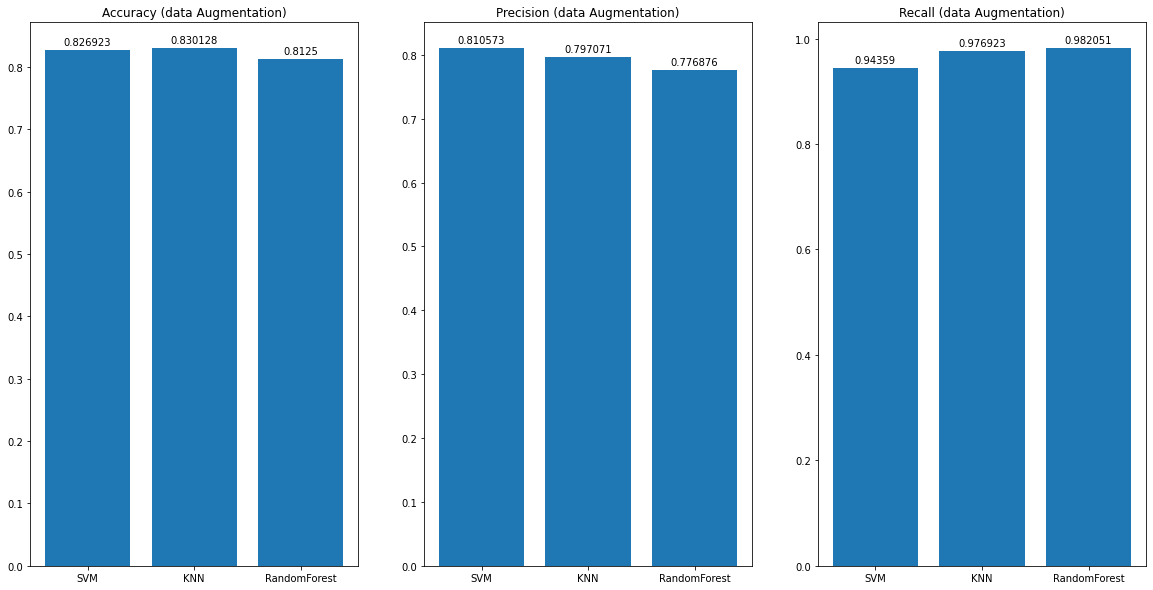

In [43]:
fig, (ax4, ax5,ax6) = plt.subplots(1, 3,figsize=(20,10))
x = ['SVM','KNN','RandomForest']
h = [Results2_aug['SVM-A'],Results2_aug['KNN-A'],Results_aug['RAN-A']]
ax4.set_title("Accuracy (data Augmentation)")
rects4 = ax4.bar(x=x , height= h,width=0.8)
ax4.bar_label(rects4, padding=3)

x = ['SVM','KNN','RandomForest']
h = [Results2_aug['SVM-P'],Results2_aug['KNN-P'],Results_aug['RAN-P']]
rects5 = ax5.bar(x=x , height= h,width=0.8)
ax5.bar_label(rects5, padding=3)

ax5.set_title("Precision (data Augmentation)")

x = ['SVM','KNN','RandomForest']
h = [Results2_aug['SVM-R'],Results2_aug['KNN-R'],Results_aug['RAN-R']]

rects6= ax6.bar(x=x , height= h,width=0.8)
ax6.bar_label(rects6, padding=3)
ax6.set_title("Recall (data Augmentation)")







#### Conclusion
In End, we try to solve imbalanced data using Over-samples SOMTE and data augmentation, and the most successful one is over samples SMOTE since gives us a better response with the highest accuracy of 87% and precision of 88% and 91% for recall, and for data augmentation, we got the highest accuracy 83% and 79% for precision and 97% for recall. So we can say Oversample SMOTE solves our imbalanced problem. and K nearest neighbor is the best classifier that gives us the best results with accuracy of 87% and precision of 88% and 91% recall.

#### References
[1] N. V. Chawla, K. W. Bowyer, L. O. Hall, & W. P. Kegelmeyer. (n.d.). SMOTE: Synthetic Minority Over-sampling Technique. arXiv.org. https://arxiv.org/abs/1106.1813